In [1]:
from sympy import factorial, symbols, init_printing, Symbol


init_printing()
alpha = Symbol('\\alpha')
dx = Symbol('\Delta x')
dt = Symbol('\Delta t')
Tjn, Tjnp1, Tjm2n, Tjm1n, Tjp1n, Tjp2n = symbols('T_{j}^{n}, T_{j}^{n+1}, T_{j-2}^{n}, T_{j-1}^{n}, T_{j+1}^{n}, T_{j+2}^{n}')

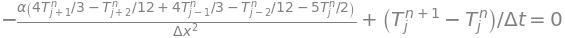

In [2]:
from sympy import Eq, Rational


dTdt = (Tjnp1 - Tjn)/dt
dTdx = (Rational(-1, 12)*Tjm2n + Rational(4,3)*Tjm1n - Rational(5,2)*Tjn + Rational(4,3)*Tjp1n - Rational(1,12)*Tjp2n)/dx**2
discrete_eq = Eq(dTdt - alpha*dTdx, 0)
discrete_eq

In [3]:
from sympy import Add, factorial, Matrix, Order


n_m = 10
m = []
for i in range(n_m):
    row = []
    for j in range(n_m):
        if i < 4:
            x_script = i*'x'
        else:
            x_script = 'x^{{{:}}}'.format(i)
        if j < 4:
            t_script = j*'t'
        else:
            t_script = 't^{{{:}}}'.format(j)
        row.append(Symbol('T_{{{:}{:}}}'.format(x_script, t_script)))
    m.append(row)
dT = Matrix(m)

dx = Symbol('\Delta x')
dt = Symbol('\Delta t')

dx_order = 7
dt_order = 2

def P(dx, dt, dT, n):
    series_terms = []
    for i in range(0, n+1):
        for j in range(0, i + 1):
            series_terms.append((1/(factorial(i - j)*factorial(j))) * (dx)**(i-j) * (dt)**j * dT[i - j, j])
    series_terms.extend([Order(dx**(n + 1)), Order(dt**(n + 1))])
    return Add(*series_terms)

In [4]:
Tjn_series = P(0, 0, dT, 1)
Tjn_series

In [5]:
Tjnp1_series = P(0, dt, dT, dt_order)
Tjnp1_series

In [6]:
Tjm2n_series = P(-2*dx, 0, dT, dx_order)
Tjm2n_series

In [7]:
Tjm1n_series = P(-dx, 0, dT, dx_order)
Tjm1n_series

In [8]:
Tjp1n_series = P(dx, 0, dT, dx_order)
Tjp1n_series

In [9]:
Tjp2n_series = P(2*dx, 0, dT, dx_order)
Tjp2n_series

In [10]:
from sympy import expand


series_subs = [(Tjn, Tjn_series), (Tjnp1, Tjnp1_series), (Tjm2n, Tjm2n_series), (Tjm1n, Tjm1n_series), (Tjp1n, Tjp1n_series), (Tjp2n, Tjp2n_series)]

series_eq = expand(discrete_eq.subs(series_subs)).reversed.reversedsign
series_eq

In [11]:
lhs = dT[0,1] - alpha*dT[2,0]
lhs

In [12]:
rhs = series_eq.rhs + lhs
rhs

In [13]:
Eq(lhs, rhs)

In [14]:
t_term = rhs.args[0]
t_term

In [15]:
Eq(dT[0, 2], alpha**2*dT[4,0])

In [16]:
s = Symbol('s')

Eq(s, alpha*dt/dx**2)

In [17]:
t_to_x_term = t_term.subs([(dT[0,2], alpha**2*dT[4,0]), (dt*alpha, s*dx**2)])
t_to_x_term

In [18]:
rhs.subs(t_term, t_to_x_term)

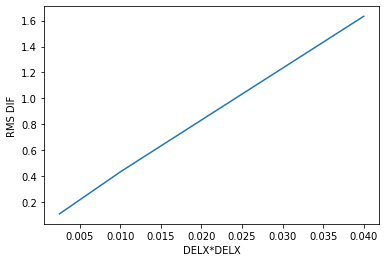

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# from prob4.1.out
delx = np.array([2.000e-01, 1.000e-01, 5.000e-02])
rms_diff = np.array([1.6340e+00, 4.3245e-01, 1.0806e-01])

_ = plt.plot(delx**2, rms_diff)
_ = plt.xlabel('DELX*DELX')
_ = plt.ylabel('RMS DIF')